# Machine Failure

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [3]:
from utils import *

### Step 1 - Data Ingestion

In [4]:
import pandas as pd

df = pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


Target Feature - Machine Failure
1. 0 --> Working
2. 1 --> Failed

In [5]:
df["Machine failure"].unique()

array([0, 1])

In [6]:
a = df["Machine failure"].value_counts()
a

Machine failure
0    134281
1      2148
Name: count, dtype: int64

<Axes: title={'center': 'Machine Failure Distribution'}, xlabel='Machine Failure', ylabel='Count'>

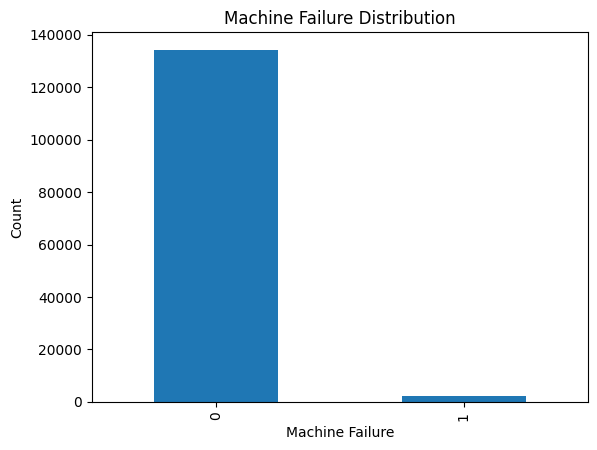

In [7]:
a.plot(
    kind="bar",
    title="Machine Failure Distribution",
    xlabel="Machine Failure",
    ylabel="Count",
)

### Step 2 - Data Quality Checks

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [9]:
m = df.isna().sum()
m

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Separate X & Y(Target Feature)

In [11]:
X = df.drop(columns=["id", "Machine failure"])
Y = df["Machine failure"]

In [12]:
X.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [13]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

### Step 4 - Preprocessing on X

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   TWF                      136429 non-null  int64  
 8   HDF                      136429 non-null  int64  
 9   PWF                      136429 non-null  int64  
 10  OSF                      136429 non-null  int64  
 11  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 12.5+ MB


In [15]:
from utils import preprocess_data

In [16]:
X_pre, pre = preprocess_data(X)
X_pre.head()

MemoryError: Unable to allocate 10.1 GiB for an array with shape (9977, 136429) and data type float64